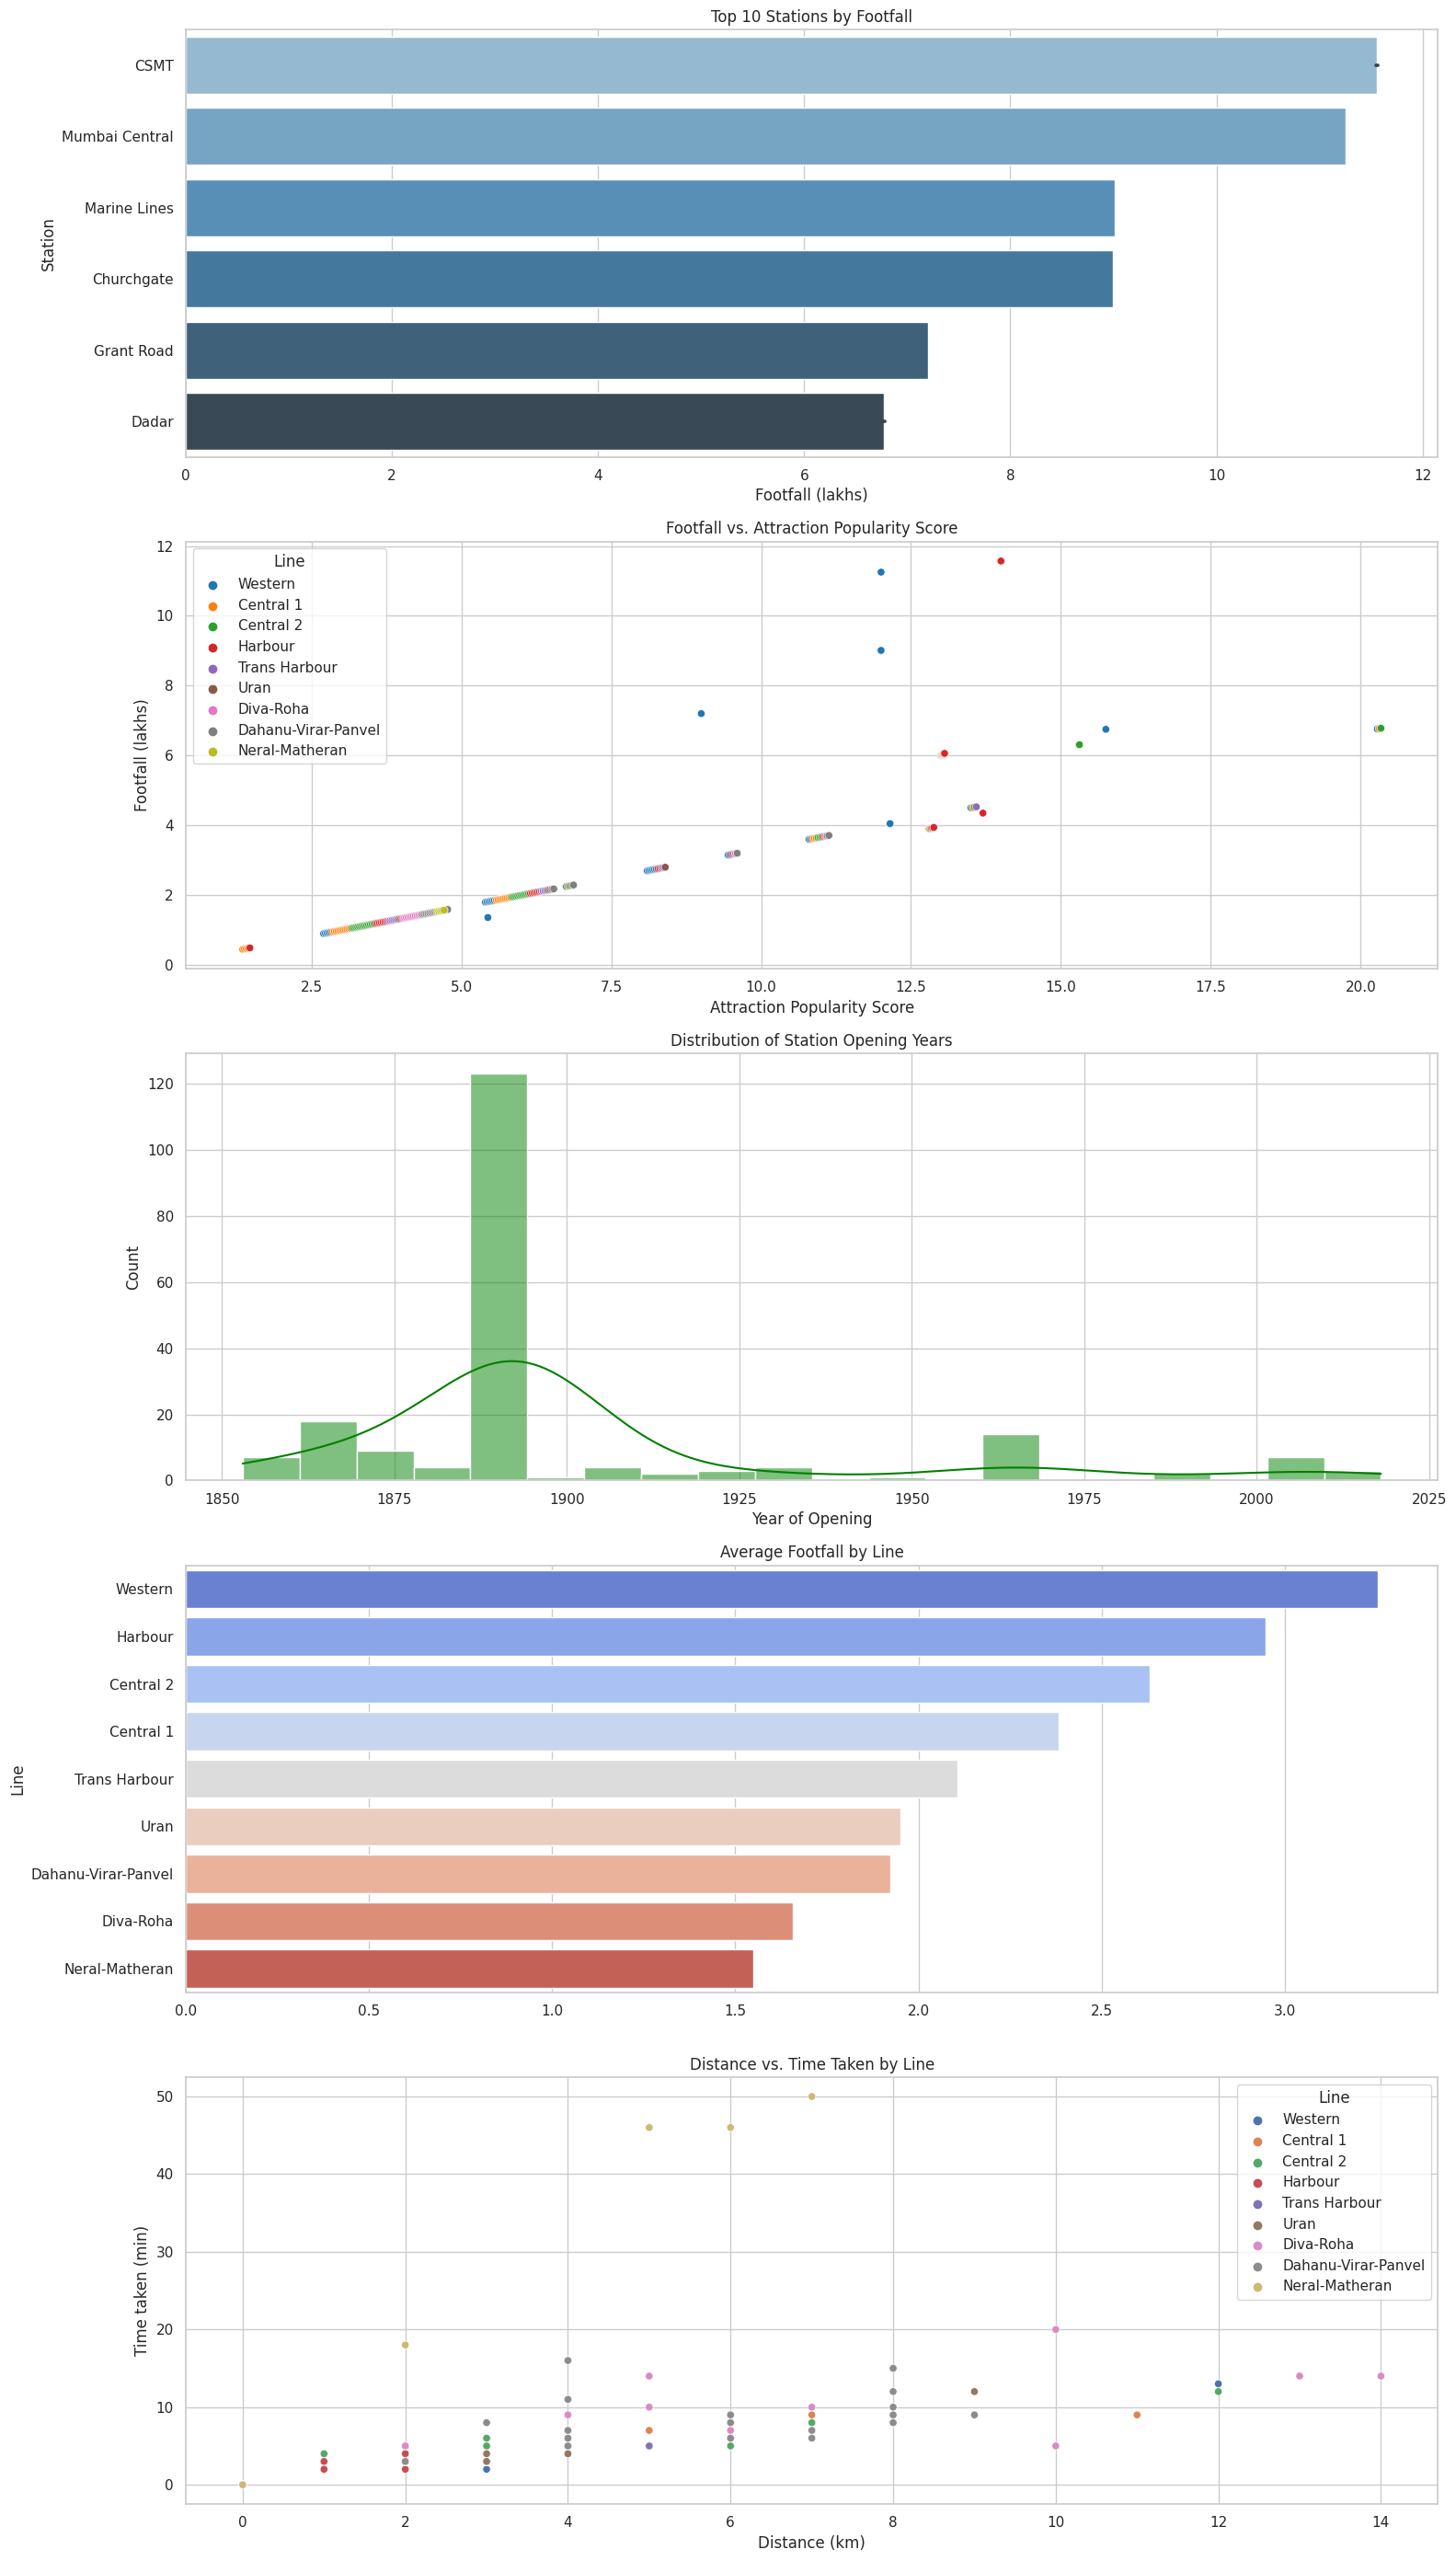

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Load data
df = pd.read_csv("/kaggle/input/mumbai-train/Mumbai_Train_final.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Extract numeric values from strings
df["Distance (km)"] = pd.to_numeric(
    df["Distance From Previous of the Line"].str.extract(r"(\d+\.?\d*)")[0], errors='coerce'
)
df["Time taken (min)"] = pd.to_numeric(
    df["Time taken From Previous of the Line"].str.extract(r"(\d+\.?\d*)")[0], errors='coerce'
)

# Drop original columns
df.drop(columns=["Distance From Previous of the Line", "Time taken From Previous of the Line"], inplace=True)

# Fill missing values (safely)
df["Platforms"] = df["Platforms"].fillna(df["Platforms"].median())
df["Tracks"] = df["Tracks"].fillna(df["Tracks"].median())
df["Year of Opening"] = df["Year of Opening"].fillna(df["Year of Opening"].median())

# Handle inf/-inf values (recommended by pandas)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Optional: save cleaned dataset
df.to_csv("Mumbai_Train_cleaned.csv", index=False)

# -------------------------------------
# Visualizations / EDA Section
# -------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(16, 28))

# 1. Top 10 stations by footfall
plt.subplot(5, 1, 1)
top_footfall = df.sort_values("Footfall (lakhs)", ascending=False).head(10)
sns.barplot(x="Footfall (lakhs)", y="Station", data=top_footfall, palette="Blues_d")
plt.title("Top 10 Stations by Footfall")

# 2. Footfall vs. Attraction Popularity Score
plt.subplot(5, 1, 2)
sns.scatterplot(x="Attraction Popularity Score", y="Footfall (lakhs)", hue="Line", data=df, palette="tab10")
plt.title("Footfall vs. Attraction Popularity Score")

# 3. Distribution of stations by year of opening
plt.subplot(5, 1, 3)
sns.histplot(df["Year of Opening"], bins=20, kde=True, color="green")
plt.title("Distribution of Station Opening Years")

# 4. Average footfall by line
plt.subplot(5, 1, 4)
avg_footfall_line = df.groupby("Line")["Footfall (lakhs)"].mean().sort_values(ascending=False)
sns.barplot(x=avg_footfall_line.values, y=avg_footfall_line.index, palette="coolwarm")
plt.title("Average Footfall by Line")

# 5. Distance vs. Time taken
plt.subplot(5, 1, 5)
sns.scatterplot(x="Distance (km)", y="Time taken (min)", hue="Line", data=df)
plt.title("Distance vs. Time Taken by Line")

plt.tight_layout()
plt.show()
